## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.

total_mice = len(mouse_data_complete.groupby('Mouse ID'))

total_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID','Timepoint'])]

duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_complete = mouse_data_complete.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = False)

clean_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

len(clean_data_complete)


1883

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_groupby = clean_data_complete.groupby('Drug Regimen')

mean_volume = drug_groupby.mean()['Tumor Volume (mm3)']
median_volume = drug_groupby.median()['Tumor Volume (mm3)']
variance_volume = drug_groupby.var()['Tumor Volume (mm3)']
sd_volume = drug_groupby.std()['Tumor Volume (mm3)']
sem_volume = drug_groupby.sem()['Tumor Volume (mm3)']

volume_summary = pd.DataFrame({
                    "Mean Tumor Volume": mean_volume,
                    "Median Tumor Volume": median_volume,
                    "Variance of Tumor Volume": variance_volume,
                    "Standard Deviation of Tumor Volume": sd_volume,
                    "Standard Error of Tumor Volume": sem_volume,
})

volume_summary

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_volume_summary = clean_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})

agg_volume_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

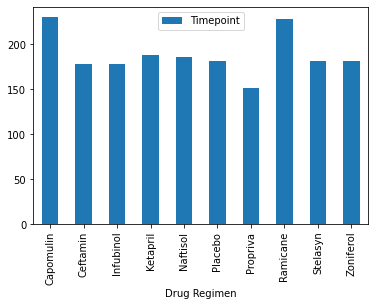

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_counts = clean_data_complete.groupby('Drug Regimen').count()

drug_counts.plot(kind = 'bar', y = 'Timepoint')


<BarContainer object of 10 artists>

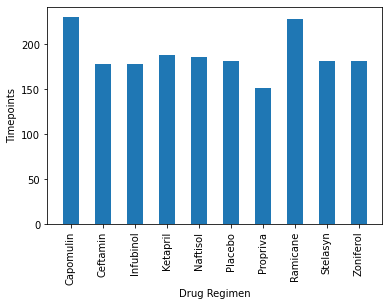

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = drug_counts.index.values
y_axis = drug_counts['Timepoint'].values

plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('Timepoints')

plt.bar(x_axis, y_axis, width = 0.5)

<AxesSubplot:ylabel='Drug Regimen'>

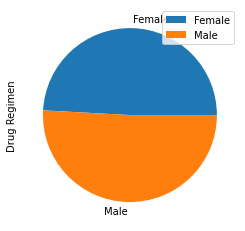

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = clean_data_complete.groupby('Sex').count()

gender_counts.plot(kind = 'pie', y = 'Drug Regimen')

([<matplotlib.patches.Wedge at 0x7fdccc304370>,
 [Text(0.030277540496140565, 1.099583225836728, 'Female'),
  Text(-0.030277540496141186, -1.099583225836728, 'Male')])

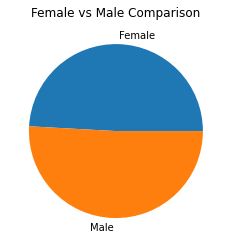

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Female vs Male Comparison")
plt.pie(gender_counts['Drug Regimen'], labels = ['Female', 'Male'])


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_df = clean_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
max_df = max_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = max_df.merge(clean_data_complete, on = ['Mouse ID','Timepoint'])

#merged_df.drop(['Sex','Age_months','Weight (g)','Metastatic Sites'], axis = 1)

merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


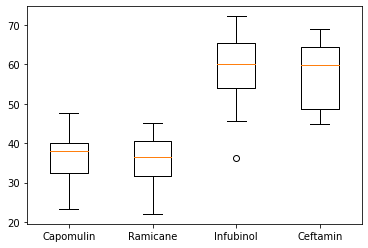

In [84]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_volume = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # add subset 
    tumor_data.append(drug_volume['Tumor Volume (mm3)'])

    # Determine outliers using upper and lower bounds

    
    
#quartiles = tumor_data.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of Volumes is: {lowerq}")
#print(f"The upper quartile of Volumes is: {upperq}")
#print(f"The interquartile range of Volumes is: {iqr}")
#print(f"The the median of Volumes is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
    
plt.boxplot(tumor_data, labels = treatments)
plt.show()

#tumor_data


In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

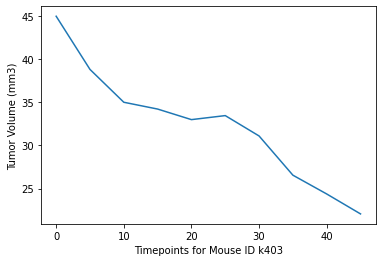

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_k = clean_data_complete.loc[clean_data_complete['Mouse ID'] == 'k403']

plt.plot(mouse_k['Timepoint'], mouse_k['Tumor Volume (mm3)'])

plt.xlabel("Timepoints for Mouse ID k403")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

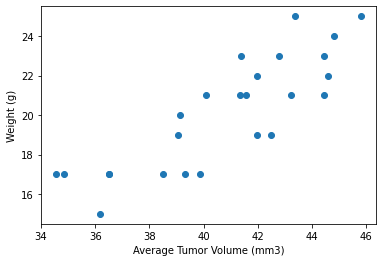

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = clean_data_complete.loc[clean_data_complete['Drug Regimen'] == 'Capomulin']

avg_cap_volume_df = capomulin_df.groupby(['Mouse ID']).mean()

avg_cap_volume_df

x_axis = avg_cap_volume_df['Tumor Volume (mm3)']
y_axis = avg_cap_volume_df['Weight (g)']

plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

plt.scatter(x_axis, y_axis)

## Correlation and Regression

r = 0.841936342469472


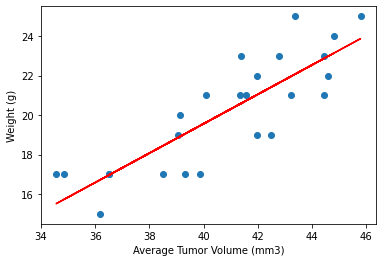

In [92]:
# Calculate the correlation coefficient and linear regression model 

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

# for mouse weight and average tumor volume for the Capomulin regimen
